In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [12]:
# List of CSV filenames
csv_files = [
    r'data\Bold_744H-10_31-11_07.csv',
    r'data\Courageous_729H-09_25-09_28.csv',
    r'data\Fearless_709H-10_31-11_07.csv',
    r'data\Gallant_102H-10_04-10_11.csv',
    r'data\Noble_4H-10_24-10_29.csv',
    r'data\Resolute_728H-10_14-10_21.csv',
    r'data\Ruthless_745H-10_01-10_08.csv',
    r'data\Steadfast_505H-10_30-11_07.csv',
    r'data\Valiant_505H-09_22-09_30.csv'
]

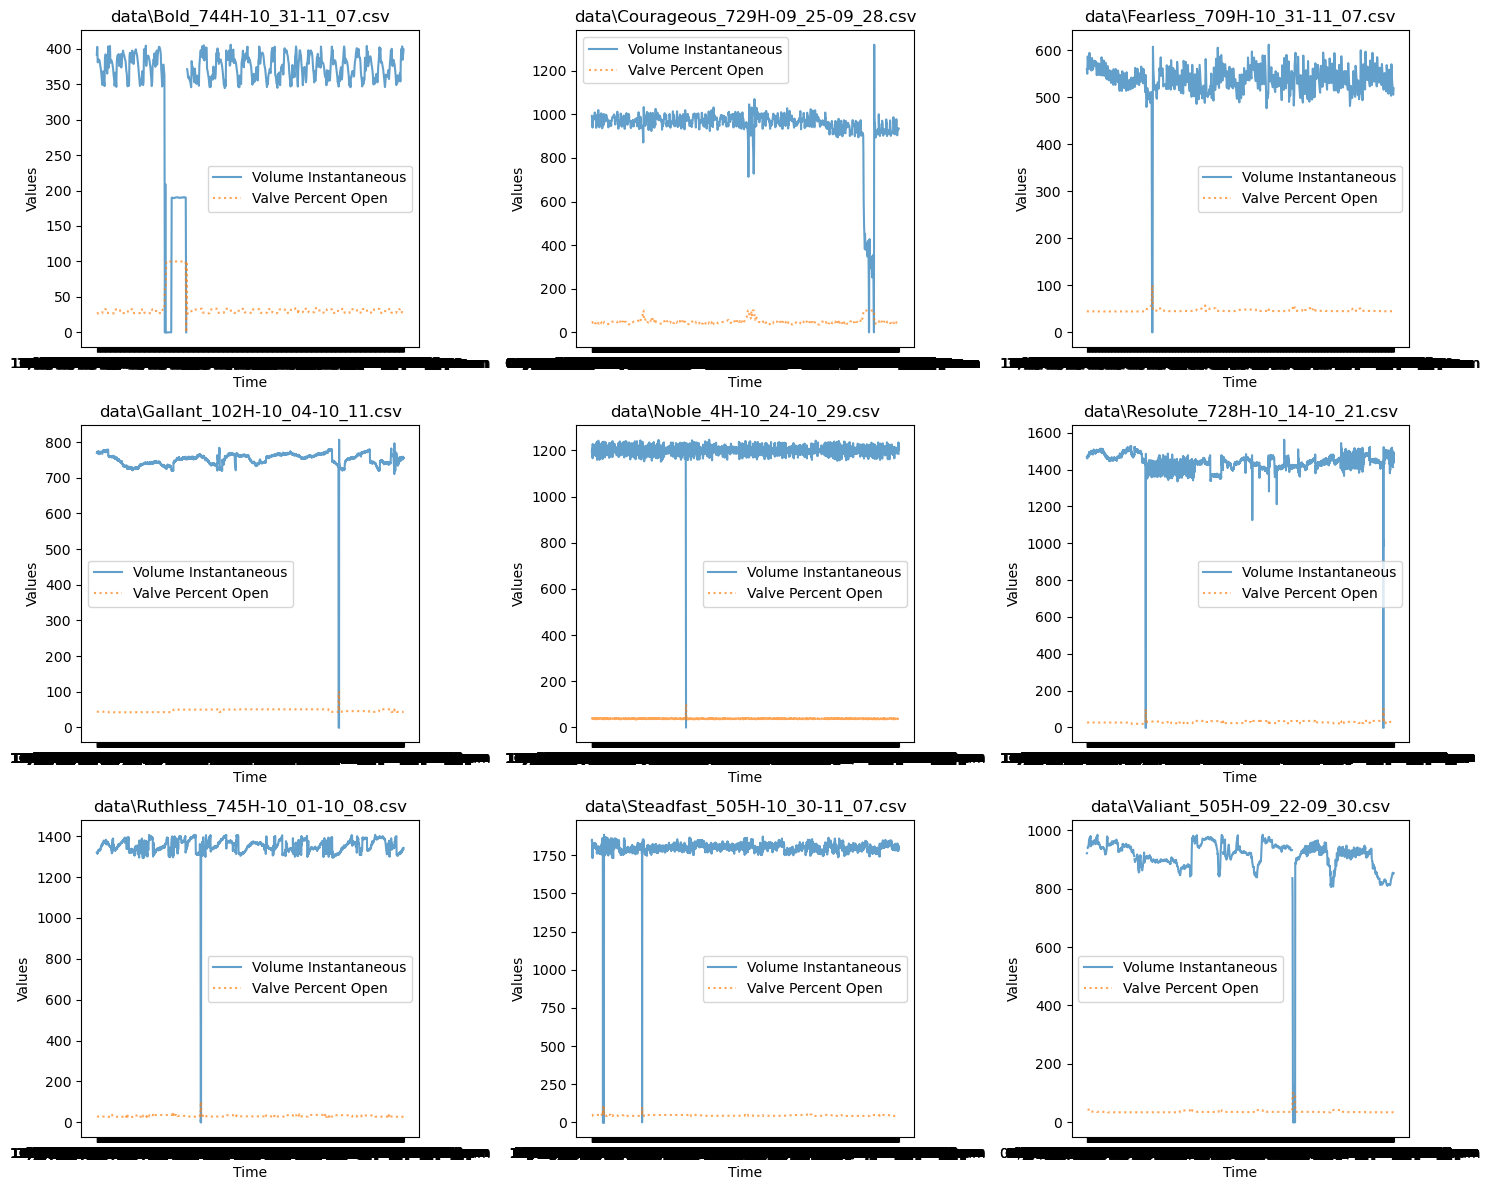

In [13]:

# Number of files to plot
num_files = len(csv_files)

# Create subplots: Arrange 3 rows and 3 columns (you can adjust this as needed)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array to easily iterate through subplots
axes = axes.flatten()

# Loop through each file and plot its data in a separate subplot
for i, file_name in enumerate(csv_files):
    # Read the CSV file
    df = pd.read_csv(file_name)
    # df['Inj Gas Valve Percent Open'].fillna(method='ffill', inplace=True)
    df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].ffill()

    # Plot the data on the corresponding subplot (axes[i])
    axes[i].plot(df['Time'], df['Inj Gas Meter Volume Instantaneous'],
                 label='Volume Instantaneous', linestyle='-', alpha=0.7)

    axes[i].plot(df['Time'], df['Inj Gas Valve Percent Open'],
                 label='Valve Percent Open', linestyle=':', alpha=0.7)

    # Set titles and labels for each subplot
    axes[i].set_title(f'{file_name}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# corrolation matrix 
combined_df = pd.read_csv(r'combinedDataset.csv')

combined_df.drop('Time', axis=1, inplace=True)
combined_df.info()

corrolation_matrix = combined_df.corr()
corrolation_matrix




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24158 entries, 0 to 24157
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Inj Gas Meter Volume Instantaneous  24095 non-null  float64
 1   Inj Gas Meter Volume Setpoint       24158 non-null  float64
 2   Inj Gas Valve Percent Open          11782 non-null  float64
 3   Deviation                           24095 non-null  float64
 4   Time Difference (minutes)           24157 non-null  float64
 5   Rate of Change Volume (per minute)  24034 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open,Deviation,Time Difference (minutes),Rate of Change Volume (per minute)
Inj Gas Meter Volume Instantaneous,1.000000,0.984448,-0.466430,-0.197804,0.002105,0.056526
Inj Gas Meter Volume Setpoint,0.984448,1.000000,-0.396929,-0.036819,0.002369,-0.009895
Inj Gas Valve Percent Open,-0.466430,-0.396929,1.000000,0.365086,-0.001252,-0.064451
Deviation,-0.197804,-0.036819,0.365086,1.000000,0.002287,-0.279798
Time Difference (minutes),0.002105,0.002369,-0.001252,0.002287,1.000000,-0.000041
Rate of Change Volume (per minute),0.056526,-0.009895,-0.064451,-0.279798,-0.000041,1.000000


<Axes: >

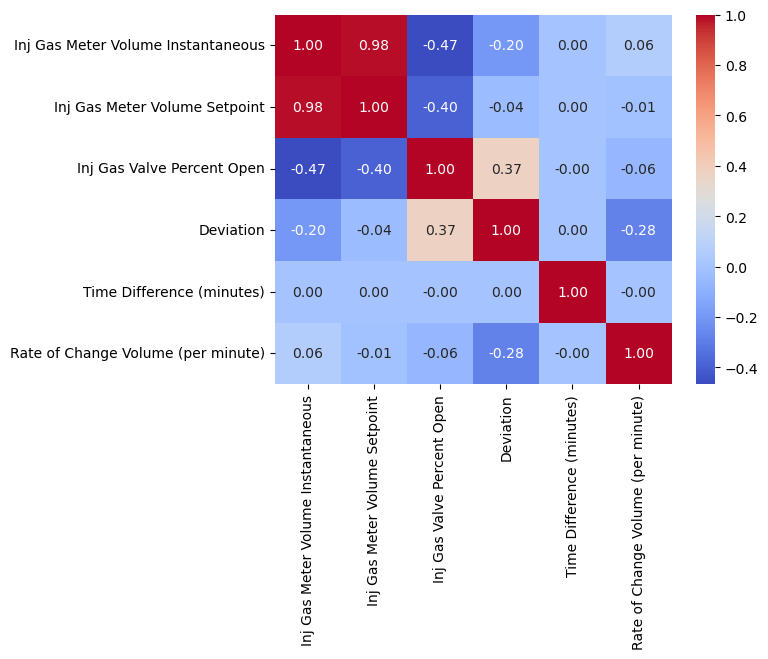

In [ ]:
# heat map it 
import seaborn as sns
sns.heatmap(corrolation_matrix, annot=True,   # Annotate each cell with the correlation value
            cmap='coolwarm',    # Use a color map
            fmt=".2f")